In [2]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
print("Setup Complete")

Setup Complete


In [3]:
df_path = "/content/prosper_new.csv"

df = pd.read_csv(df_path)

In [4]:
df.head()


,Unnamed: 0,ListingCategory,BorrowerState,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating,EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR,LoanStatusNew
0,1,8,5,0,4,1,18,6247,1,0,0,1,1104,325,0
1,3,12,10,1,3,1,15,1955,1,0,0,1,1104,375,0
2,4,8,21,1,2,1,26,8347,1,4,0,1,1604,1383,0
3,5,5,29,1,2,1,36,7911,2,2,0,1,1604,619,0
4,6,5,15,0,3,1,27,1000,1,5,0,1,198,1870,0


In [5]:
df.shape


(83982, 15)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83982 entries, 0 to 83981
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           83982 non-null  int64
 1   ListingCategory      83982 non-null  int64
 2   BorrowerState        83982 non-null  int64
 3   IsBorrowerHomeowner  83982 non-null  int64
 4   IncomeRange          83982 non-null  int64
 5   IncomeVerifiable     83982 non-null  int64
 6   DebtToIncomeRatio    83982 non-null  int64
 7   StatedMonthlyIncome  83982 non-null  int64
 8   Term                 83982 non-null  int64
 9   ProsperRating        83982 non-null  int64
 10  EmploymentStatus     83982 non-null  int64
 11  LoanStatus           83982 non-null  int64
 12  LoanOriginalAmount   83982 non-null  int64
 13  BorrowerAPR          83982 non-null  int64
 14  LoanStatusNew        83982 non-null  int64
dtypes: int64(15)
memory usage: 9.6 MB


In [7]:
df.isnull().sum()


Unnamed: 0             0
ListingCategory        0
BorrowerState          0
IsBorrowerHomeowner    0
IncomeRange            0
IncomeVerifiable       0
DebtToIncomeRatio      0
StatedMonthlyIncome    0
Term                   0
ProsperRating          0
EmploymentStatus       0
LoanStatus             0
LoanOriginalAmount     0
BorrowerAPR            0
LoanStatusNew          0
dtype: int64

# **Random Forest for Classification**

**Importing Packages**

In [8]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

**Splitting the Data**

In [25]:
# Split the data into features (X) and target (y)
X = df.drop('ProsperRating',axis = 1)
y = df['ProsperRating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred = rf.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8855152705840329


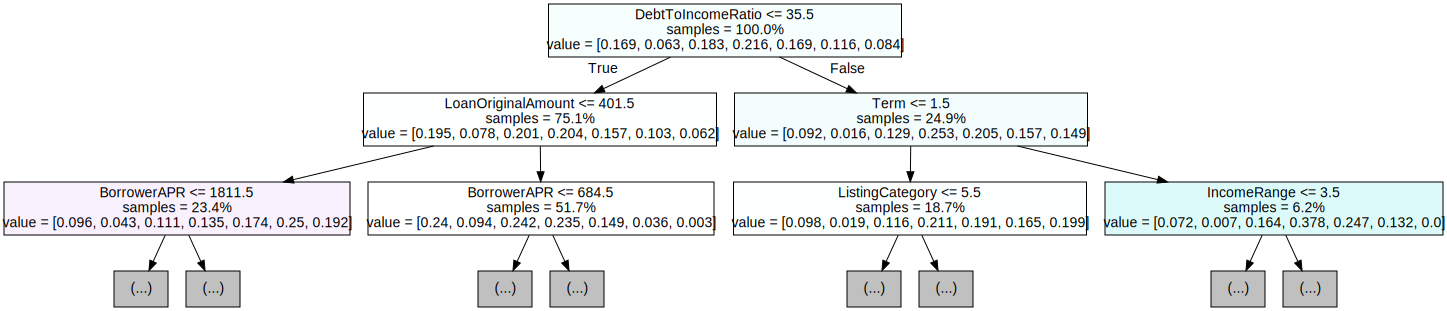

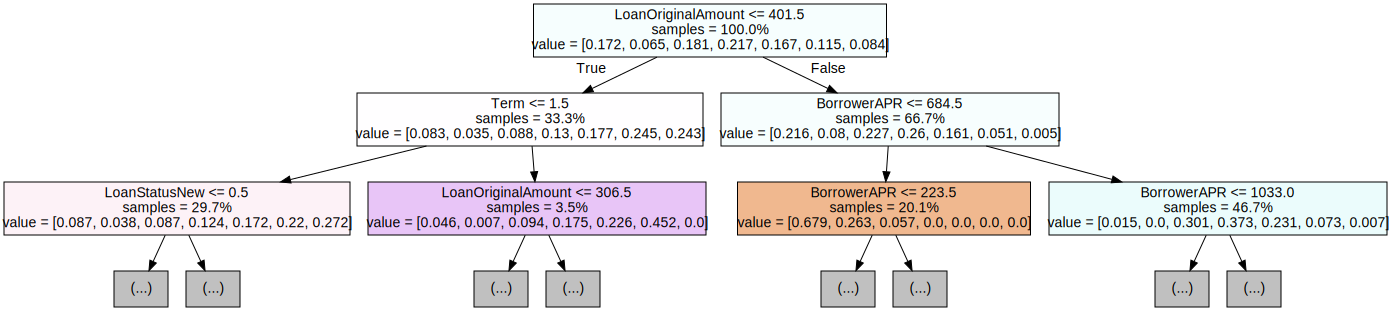

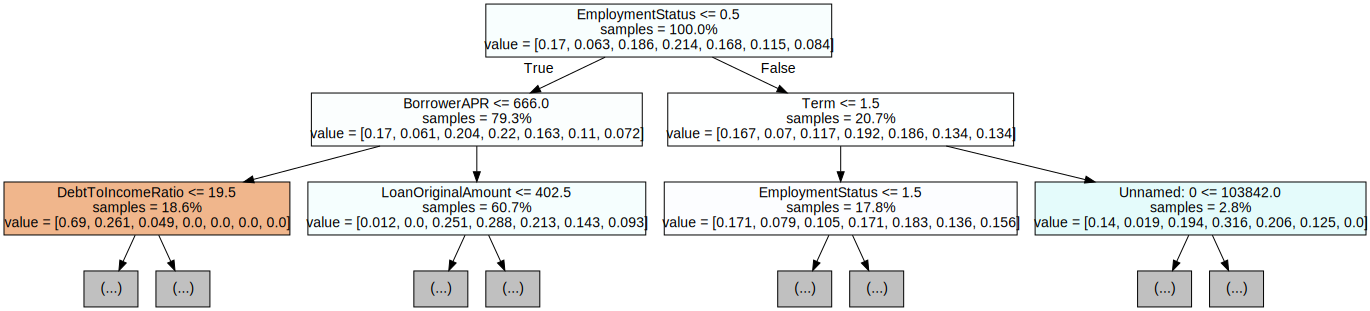

In [29]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [30]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ffb7634e3a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ffb7634e370>})

In [31]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 300}


<Figure size 1080x720 with 0 Axes>

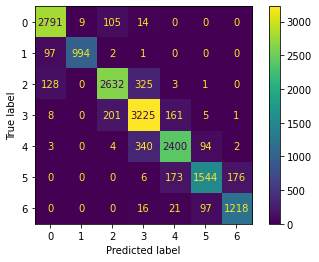

In [38]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

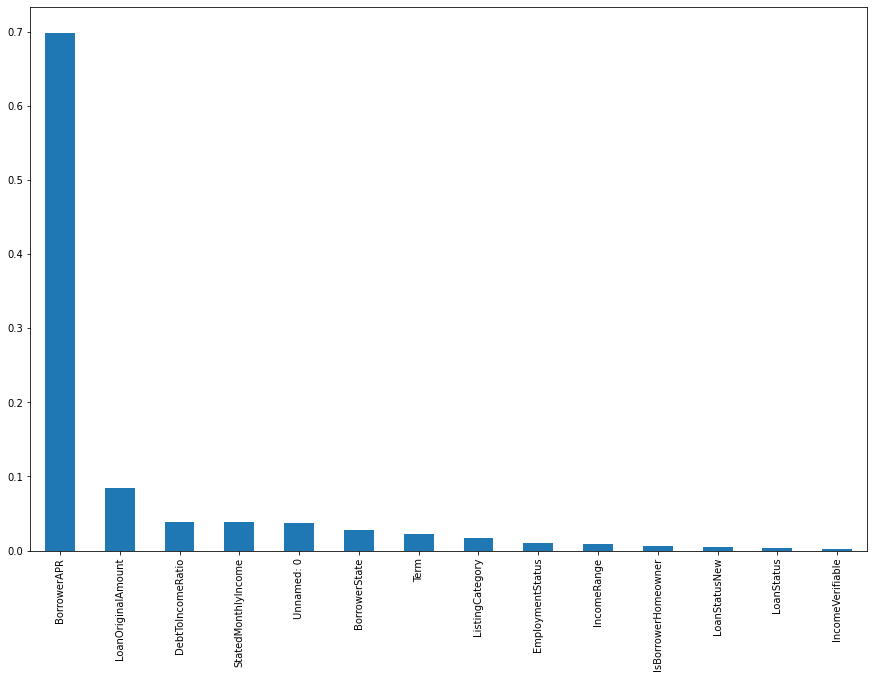

In [37]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
plt.figure(figsize = (15,10))
feature_importances.plot.bar();